# Assignment 2: Linear Models and Validation Metrics (30 marks total)
### Due: October 10 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [25]:
# TO DO: Import spam dataset from yellowbrick library
from yellowbrick.datasets import load_spam
X, y = load_spam()

# TO DO: Print size and type of X and y
print("The size of X is {0} and the type is {1} for the spam dataset.".format(X.shape, type(X)))
print("The size of y is {0} and the type is {1} for the spam dataset.".format(y.shape, type(y)))

The size of X is (4600, 57) and the type is <class 'pandas.core.frame.DataFrame'> for the spam dataset.
The size of y is (4600,) and the type is <class 'pandas.core.series.Series'> for the spam dataset.


### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [26]:
# TO DO: Check if there are any missing values and fill them in if necessary
print(X.isnull().sum())
print("There are {0} values missing in the y type dataset.".format(y.isnull().sum()))

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [28]:
# TO DO: Create X_small and y_small 
# I understand this part of the assignment to be taking 5% of the dataset and splitting that into an 80-20 split. 
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(X, y, train_size=0.05, random_state=42)
X_small, X_smalltest, y_small, y_smalltest = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

X_small.shape

(184, 57)

### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [20]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.linear_model import LogisticRegression

# ALL THE DATA, with an 80-20 train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_all = LogisticRegression(max_iter=2000)
model_all.fit(X_train, y_train)

# training (training set) and validation (testing set)
# .score calculates the r2 values 
train_all_score = model_all.score(X_train, y_train)
valid_all_score = model_all.score(X_test, y_test)
# print("Training set score: {:.3f}".format(model_all.score(X_train, y_train)))
# print("Validation set score: {:.3f}".format(model_all.score(X_test, y_test)))


# FIRST 2 COLUMNS, also with an 80-20 train-test split 
X_subset = X.iloc[:, :2]
X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(X_subset, y, test_size=0.2, random_state=42)

model_cols = LogisticRegression(max_iter=2000)
model_cols.fit(X_subtrain, y_subtrain)

train_2cols_score = model_cols.score(X_subtrain, y_subtrain)
valid_2cols_score = model_cols.score(X_subtest, y_subtest)
# print("Training set score: {:.3f}".format(model_cols.score(X_subtrain, y_subtrain)))
# print("Validation set score: {:.3f}".format(model_cols.score(X_subtest, y_subtest)))


# 5% SUBSET OF DATA  
model_small = LogisticRegression(max_iter=2000)
model_small.fit(X_small, y_small)

train_5p_score = model_small.score(X_small, y_small)
valid_5p_score = model_small.score(X_smalltest, y_smalltest)
# print("\nStats for 5% of the data:")
# print("Training set score: {:.3f}".format(model_small.score(X_smalltrain, y_smalltrain)))
# print("Validation set score: {:.3f}".format(model_small.score(X_smalltest, y_smalltest)))

## Step 5
data = {'Data Size': [X_train.shape, X_subtrain.shape, X_small.shape],
            'Training Accuracy': [train_all_score, train_2cols_score, train_5p_score],
            'Validation Accuracy': [valid_all_score, valid_2cols_score, valid_5p_score]}
results = pd.DataFrame(data)
results

,Data Size,Training Accuracy,Validation Accuracy
0,"(3680, 57)",0.934239,0.908696
1,"(3680, 2)",0.620109,0.589130
2,"(184, 57)",0.961957,0.891304


### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
2. In this case, what do a false positive and a false negative represent? Which one is worse?

*YOUR ANSWERS HERE*

Using the data with only 2 columns (row 1) has a very low training and validation accuracy, at approximately 62% and 60% relatively, which suggests the model here is underfitting and honestly just does not have enough data. Using 5% of the data (row 2) shows a high training accuracy at 96% and a relatively high validation accuracy at 89%, which is similar to the validation accuracy but this may still suggest that the model here is possibly overfitting the data. Using all the data (row 0) has a pretty high training accuracy and validation accuracy at relatively 93% and 91%.    


False Positive = ML model saying its spam when it is not. False Negative = ML model saying it is not spam when it is in fact spam. 
False positive is worse because if after an email is marked at spam and it automatically goes into the spam email, a legit email will be put into a folder that no one looks at.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I used chatGPT to help me with the specific step for using train_test_split for using 5% of the dataset for the small subset. It was telling me to use test_size=0.95 so training was 5% of the data but that was not what I wanted, and I changed it to see if I could do train_size=0.05 and that seemed to work. The other steps I looked at previous in class examples that had been filled out and the rest of the information was in those notebooks, so I took code snippets from there.  

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [103]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

# TO DO: Print size and type of X and y
print("The size of X is {0} and the type is {1} for the concrete dataset.".format(X.shape, type(X)))
print("The size of y is {0} and the type is {1} for the concrete dataset.".format(y.shape, type(y)))

The size of X is (1030, 8) and the type is <class 'pandas.core.frame.DataFrame'> for the concrete dataset.
The size of y is (1030,) and the type is <class 'pandas.core.series.Series'> for the concrete dataset.


### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [104]:
# TO DO: Check if there are any missing values and fill them in if necessary
print(X.isnull().sum())
print("Data missing from the y dataset is {0}.".format(y.isnull().sum()))

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64
Data missing from the y dataset is 0.


### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with `X` and `y`

In [105]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.linear_model import LinearRegression

# X = set of input variables of features, 
# y = variable you want to predict, target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

# add model predictions to then validate the model 
# want to predict off the linear regression model that was made and use the input variables it hasn't seen before for prediction of the y values
y_train_pred = lr.predict(X_train)
y_valid_pred = lr.predict(X_val)


### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [106]:
# TO DO: ADD YOUR CODE HERE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# mean squared error (y_true, y_pred)
mse_val = mean_squared_error(y_val, y_valid_pred) # validation accuracy 
mse_train = mean_squared_error(y_train, y_train_pred) # training accuracy 

# r2 score
r2_val = r2_score(y_val, y_valid_pred) # validation accuracy 
r2_train = r2_score(y_train, y_train_pred) # training accuracy

print("Validation Accuracy, Mean Squared Error: {:.3f}, R2 Error: {:.3f}".format(mse_val, r2_val))
print("Training Accuracy, Mean Squared Error: {:.3f}, R2 Error: {:.3f}".format(mse_train, r2_train))

Validation Accuracy, Mean Squared Error: 95.635, R2 Error: 0.637
Training Accuracy, Mean Squared Error: 110.346, R2 Error: 0.609


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [139]:
# TO DO: ADD YOUR CODE HERE
results_data = {
    "MSE": [mse_train, mse_val],
    "R2": [r2_train, r2_val]   
}
results = pd.DataFrame(results_data)
print(results)

          MSE        R2
0  110.345501  0.609071
1   95.635335  0.636898


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

Row 0 = training set. Row 1 = validation/testing set

R2 represents the models ability to predict unseen samples and is similar to the general 'score'. Mean Squared Error is an error metric, and measures the models accuracy. So the model is not giving better results for the validation sets (row 1) vs the training sets (row 0) which is a bad sign because the score should not be higher on data it has not seen before. The model is not producing good results for the dataset and is likely underfittting. 


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I took code from the Jupyter Notebooks that are done in class, and asked the TA for help in the lab with making the prediction sets because I did not understand what they were and what they were used for. Specifically, this part of the code: y_train_pred = lr.predict(X_train) and y_valid_pred = lr.predict(X_va). I had challenges in understanding the results for the previous part and had to review the slides and previous examples for that. 
I actually did this section, and then went and did the bonus section because I was initially convinced that the dataset should be giving good results for the linear model and only after testing lasso and ridge and seeing bad results there, did I finally conclude that maybe the data is not appropriate for linear models

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

I think the overall pattern was that the data is not linear and I eventually went to look up the yellowbrick website on the concrete dataset and it states that the data is "highly non-linear" which makes sense why the linear regression model was not great, with the r2 of 0.609 for training and 0.637 for validation. 
I did try plotting the data below to see if that would help me understand the results but as the scatterplot shows, the data is everywhere and is helps to prove the point that its non linear data and likely needs a non-linear model. 

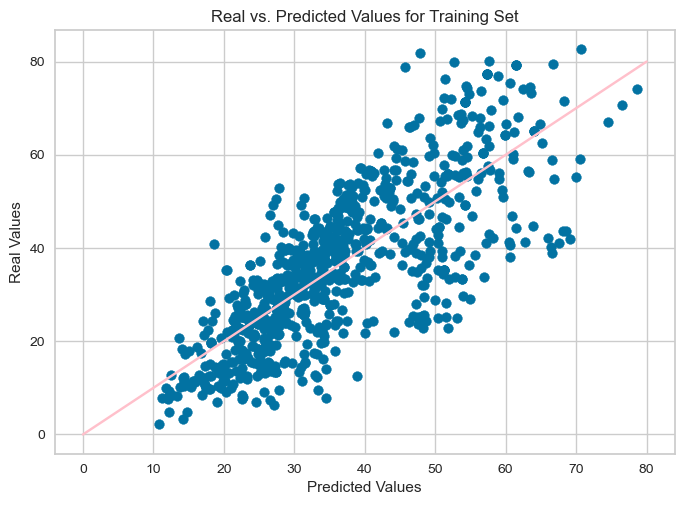

In [108]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred, y_train)
plt.plot([0, 80], [0, 80], color="pink")

plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Real vs. Predicted Values for Training Set')

plt.show()

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I found it challenging to interpret the results of the models. I was initially convinced that the data had to be linear and it took a while of me going through the notes and previous lab examples to finally come to the conclusion that the data was not linear and I think that time helped solidy those concepts. I liked that we had gone through all the examples in class that it was not difficult to implement.

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

My values are not changing much for r2 and the mse for either model and when I change the alpha values, it changes so little. My understanding is that the ridge model can be used to help with overfitting by changing alpha, via regularization, but the problem with the linear regression, was not overfitting. I think the lasso model also helps with overfitting via regularization, but it allows some features to have no weight, which also is not doing much. So overall, linear model is not appropriate for the dataset.

In [150]:
# TO DO: ADD YOUR CODE HERE
# Ridge Regression

X, y = load_concrete()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=0)

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
y_pred = ridge.predict(X_val)

print("Training score: {:.5f}".format(ridge.score(X_train, y_train)))
print("Validation score: {:.5f}".format(ridge.score(X_val, y_val)))

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print("Validation mse: {:.5f}".format(mse))

Training score: 0.64287
Validation score: 0.59272
Validation mse: 111.85324


In [152]:
ridge10 = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = ridge10.predict(X_val)

print("Training score: {:.5f}".format(ridge10.score(X_train, y_train)))
print("Validation score: {:.5f}".format(ridge10.score(X_val, y_val)))
mse = mean_squared_error(y_val, y_pred)
print("Validation mse: {:.5f}".format(mse))

Training score: 0.64287
Validation score: 0.59271
Validation mse: 111.85520


In [135]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.5f}".format(lasso.score(X_train, y_train)))
print("Validation set score: {:.5f}".format(lasso.score(X_val, y_val)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.64265
Validation set score: 0.59452
Number of features used: 8


In [156]:
# changing the alpha
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.5f}".format(lasso001.score(X_train, y_train)))
print("Validation set score: {:.5f}".format(lasso001.score(X_val, y_val)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.64287
Validation set score: 0.59273
Number of features used: 8
